In [1]:
import numpy as np

data = np.load("data/brain_tumor/sample_0.npz")

# List all array names stored in the npz
print("Keys in NPZ file:", data.files)

# Print each array
for key in data.files:
    print(f"\nArray name: {key}")
    print("Shape:", data[key].shape)
    print("Dtype:", data[key].dtype)
    print(data[key])


Keys in NPZ file: ['image', 'label']

Array name: image
Shape: (128, 128)
Dtype: float32
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]

Array name: label
Shape: (128, 128)
Dtype: float64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
import os

print(os.listdir("data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"))


['BraTS-GLI-00782-000', 'BraTS-GLI-00680-000', 'BraTS-GLI-00477-001', 'BraTS-GLI-00730-001', 'BraTS-GLI-01099-000', 'BraTS-GLI-01047-000', 'BraTS-GLI-01210-000', 'BraTS-GLI-00675-001', 'BraTS-GLI-01024-000', 'BraTS-GLI-01264-000', 'BraTS-GLI-00455-000', 'BraTS-GLI-01373-000', 'BraTS-GLI-00540-001', 'BraTS-GLI-00008-001', 'BraTS-GLI-00756-000', 'BraTS-GLI-01453-000', 'BraTS-GLI-00115-000', 'BraTS-GLI-00187-000', 'BraTS-GLI-00571-000', 'BraTS-GLI-00544-000', 'BraTS-GLI-00401-000', 'BraTS-GLI-01478-000', 'BraTS-GLI-00661-000', 'BraTS-GLI-01216-000', 'BraTS-GLI-01136-000', 'BraTS-GLI-00810-000', 'BraTS-GLI-01125-000', 'BraTS-GLI-00397-000', 'BraTS-GLI-00006-000', 'BraTS-GLI-00505-000', 'BraTS-GLI-00525-001', 'BraTS-GLI-01003-000', 'BraTS-GLI-01080-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-00291-000', 'BraTS-GLI-00715-001', 'BraTS-GLI-00645-000', 'BraTS-GLI-00485-001', 'BraTS-GLI-00549-000', 'BraTS-GLI-01662-000', 'BraTS-GLI-01092-000', 'BraTS-GLI-00694-000', 'BraTS-GLI-00084-001', 'BraTS-GLI

(240, 240, 155)
(240, 240)
[0. 1. 2. 3.]


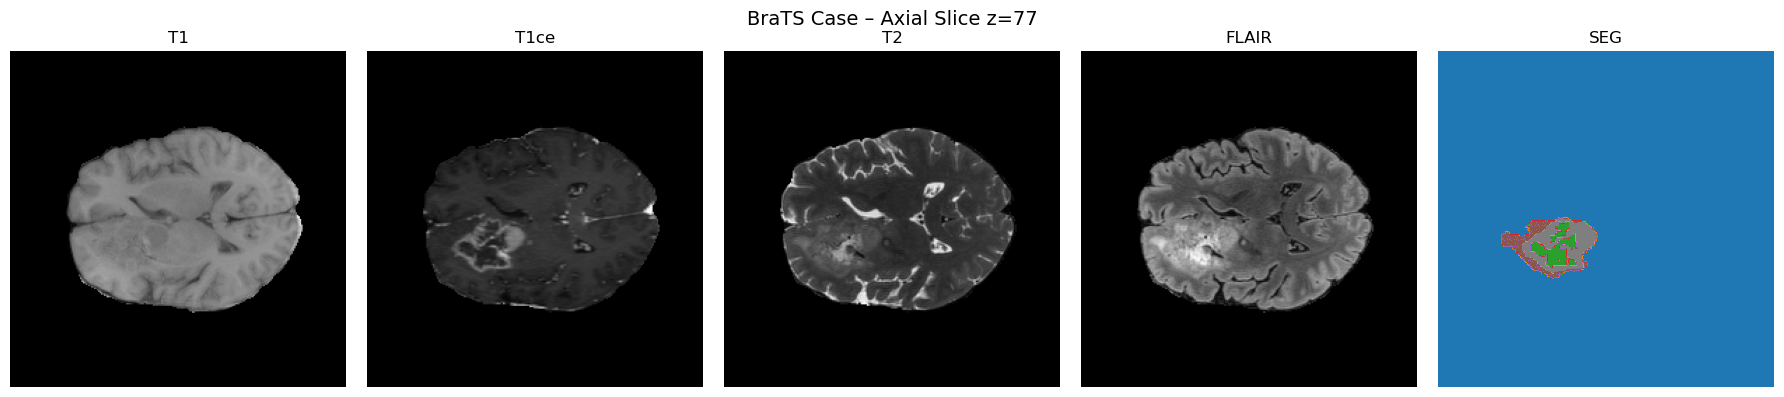

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paths (adjust if needed)
# -----------------------------
base = "data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000"

paths = {
    "T1":   f"{base}-t1n.nii.gz",
    "T1ce": f"{base}-t1c.nii.gz",
    "T2":   f"{base}-t2w.nii.gz",
    "FLAIR":f"{base}-t2f.nii.gz",
    "SEG":  f"{base}-seg.nii.gz",
}

# -----------------------------
# Load volumes
# -----------------------------
volumes = {k: nib.load(v).get_fdata() for k, v in paths.items()}

# Pick a meaningful slice (middle of volume)
print(volumes["FLAIR"].shape)
z = volumes["FLAIR"].shape[2] // 2

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for ax, (name, vol) in zip(axes, volumes.items()):
    slice_2d = vol[:, :, z]

    if name == "SEG":
        print(slice_2d.shape)
        print(np.unique(slice_2d))
        im = ax.imshow(slice_2d, cmap="tab10", vmin=0, vmax=4)
    else:
        im = ax.imshow(slice_2d, cmap="gray")

    ax.set_title(name)
    ax.axis("off")

plt.suptitle(f"BraTS Case – Axial Slice z={z}", fontsize=14)
plt.tight_layout()
plt.show()


Slice index: 77
SEG unique labels: [0. 1. 2. 3.]


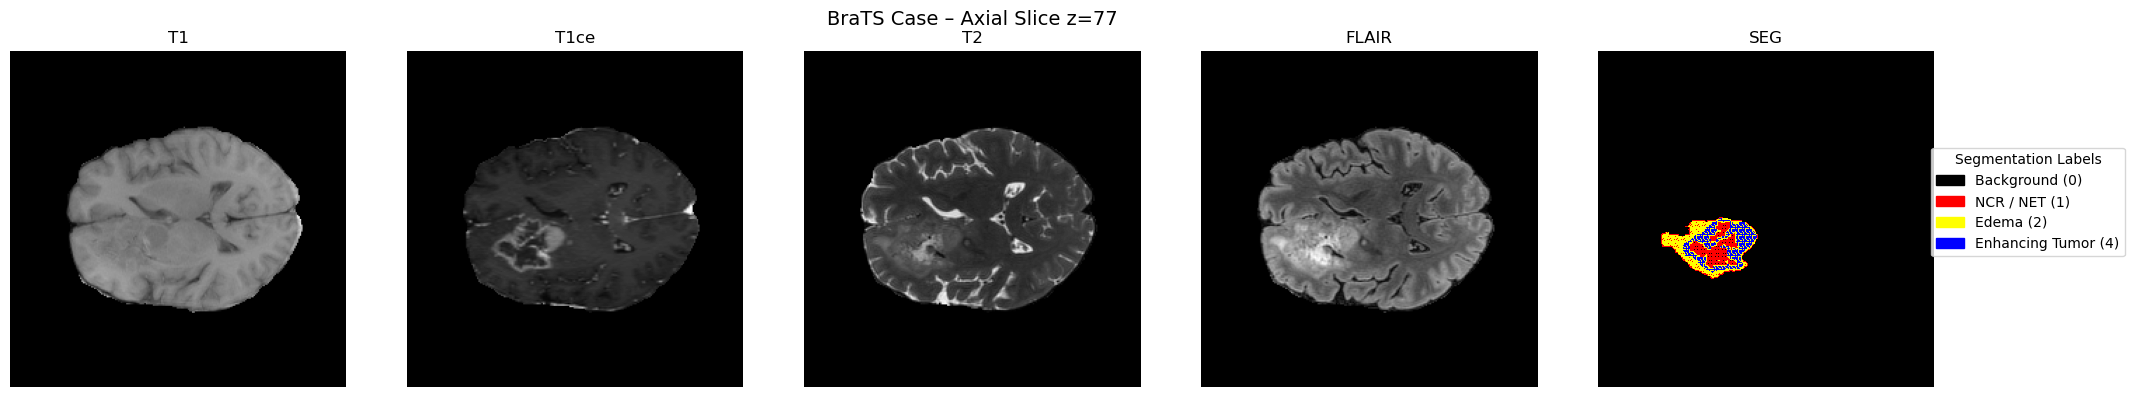

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# -----------------------------
# Paths
# -----------------------------
base = "data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000"

paths = {
    "T1":    f"{base}-t1n.nii.gz",
    "T1ce":  f"{base}-t1c.nii.gz",
    "T2":    f"{base}-t2w.nii.gz",
    "FLAIR": f"{base}-t2f.nii.gz",
    "SEG":   f"{base}-seg.nii.gz",
}

# -----------------------------
# Load volumes
# -----------------------------
volumes = {k: nib.load(v).get_fdata() for k, v in paths.items()}

# Pick middle axial slice
z = volumes["FLAIR"].shape[2] // 2
print("Slice index:", z)

# -----------------------------
# Segmentation colormap
# -----------------------------
# BraTS labels: 0, 1, 2, 4
colors = [
    "black",        # 0 - Background
    "red",          # 1 - NCR / NET
    "yellow",       # 2 - Edema
    "blue",         # 3 - Enhancing Tumor
]

cmap = ListedColormap(colors)
bounds = [0, 1, 2, 3, 5]   # handles missing label 3
norm = BoundaryNorm(bounds, cmap.N)

# Legend entries
legend_patches = [
    mpatches.Patch(color="black",  label="Background (0)"),
    mpatches.Patch(color="red",    label="NCR / NET (1)"),
    mpatches.Patch(color="yellow", label="Edema (2)"),
    mpatches.Patch(color="blue",   label="Enhancing Tumor (3)"),
]

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, (name, vol) in zip(axes, volumes.items()):
    slice_2d = vol[:, :, z]

    if name == "SEG":
        print("SEG unique labels:", np.unique(slice_2d))
        ax.imshow(slice_2d, cmap=cmap, norm=norm)
    else:
        ax.imshow(slice_2d, cmap="gray")

    ax.set_title(name)
    ax.axis("off")

# Add legend only once (outside plots)
fig.legend(
    handles=legend_patches,
    loc="center right",
    bbox_to_anchor=(1.08, 0.5),
    title="Segmentation Labels",
)

plt.suptitle(f"BraTS Case – Axial Slice z={z}", fontsize=14)
plt.tight_layout()
plt.show()
